# Clustering

## KMeans

### Initilizing Libraries

In [127]:
#initializing the libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

### Loading in the Data Frames needed

In [128]:
#Importing the dataset from the PCA section
df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 2/PCA/PCA_3.csv')
df

,PCA1,PCA2,PCA3,rank
0,2.172949,-3.199790,-2.097900,1
1,-0.310705,0.039049,-1.161996,1
2,-1.744520,-0.796050,0.408656,1
3,-3.156983,-0.917433,-0.296547,1
4,0.845263,2.422318,0.343157,1
...,...,...,...,...
115,1.371335,-0.346347,4.633585,5
116,3.256491,-4.703614,1.488428,5
117,1.405158,0.063850,0.531394,5
118,-0.497547,-0.010214,1.647895,5


### Removing the label from the df to conduct kmeans

In [129]:
data = df[['PCA1', 'PCA2', 'PCA3']]
data

,PCA1,PCA2,PCA3
0,2.172949,-3.199790,-2.097900
1,-0.310705,0.039049,-1.161996
2,-1.744520,-0.796050,0.408656
3,-3.156983,-0.917433,-0.296547
4,0.845263,2.422318,0.343157
...,...,...,...
115,1.371335,-0.346347,4.633585
116,3.256491,-4.703614,1.488428
117,1.405158,0.063850,0.531394
118,-0.497547,-0.010214,1.647895


### Conducting silhouette analysis to know the proper number of clusters to perform

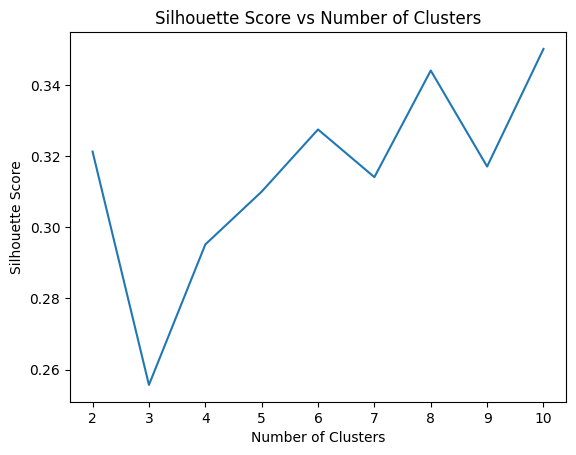

In [136]:
#conduct the silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#creating a list to store the silhouette scores
silhouette_scores = []

#creating a list of the number of clusters going from 2-10
n_clusters = np.arange(2, 11)

#looping through the number of clusters

for n in n_clusters:
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

#plotting the silhouette scores
import matplotlib.pyplot as plt
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()



### From our Silhouette Scores we will set our clusters to 6,8, and 10.

### First being 6

#### Plotting on a 3-D graph, showing just the 8 clusters and the centroids

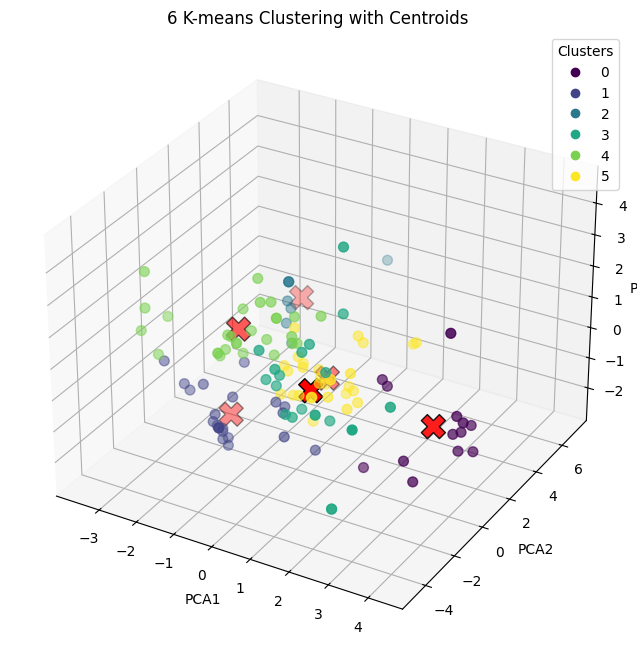

In [143]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=labels, cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('6 K-means Clustering with Centroids')

# Create a legend
legend_elements = [mpatches.Patch(label='Centroids', color='red')]
ax.legend(handles=legend_elements)

#add the clusters to the legend
plt.legend(*scatter.legend_elements(), title='Clusters')



plt.show()

#### Showing how Ranks are related to these clustered centroids

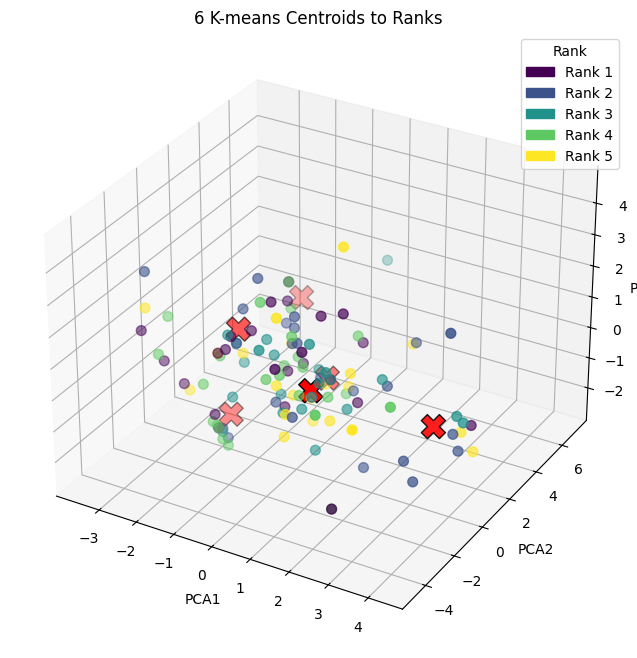

In [144]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Define the ranks (assumed to be in 'rank' column in df)
ranks = df['rank'].unique()

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=df['rank'], cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('6 K-means Centroids to Ranks')

# Add a color bar for ranks
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rank')

# Manually create legend patches based on unique ranks and corresponding colors from colormap
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(df['rank']), vmax=max(df['rank']))

# Create custom legend entries for each rank
legend_patches = [mpatches.Patch(color=cmap(norm(rank)), label=f'Rank {rank}') for rank in ranks]

# Add a legend for ranks
ax.legend(handles=legend_patches, title="Rank", loc='upper right')

#remove the color bar
cbar.remove()

plt.show()


### Next we will do this with 8 Clusters

#### Plotting on a 3-D graph, showing just the 8 clusters and the centroids

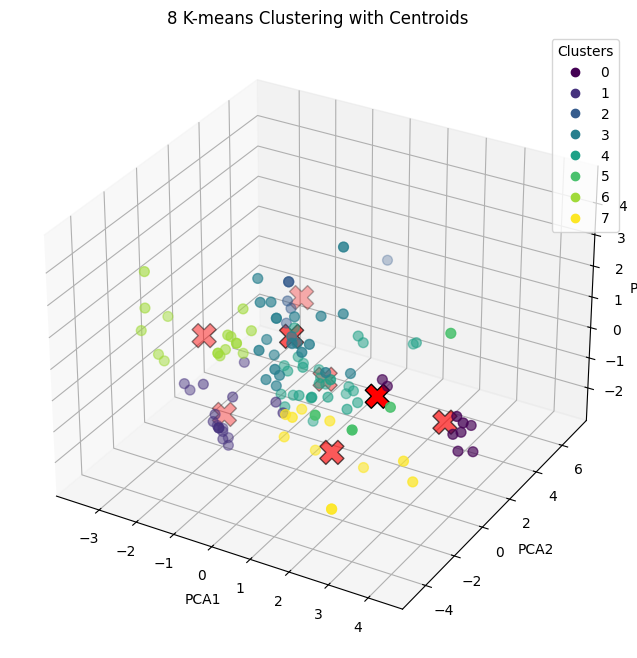

In [145]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=labels, cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('8 K-means Clustering with Centroids')

# Create a legend
legend_elements = [mpatches.Patch(label='Centroids', color='red')]
ax.legend(handles=legend_elements)

#add the clusters to the legend
plt.legend(*scatter.legend_elements(), title='Clusters')



plt.show()

#### Showing how Ranks are related to these clustered centroids

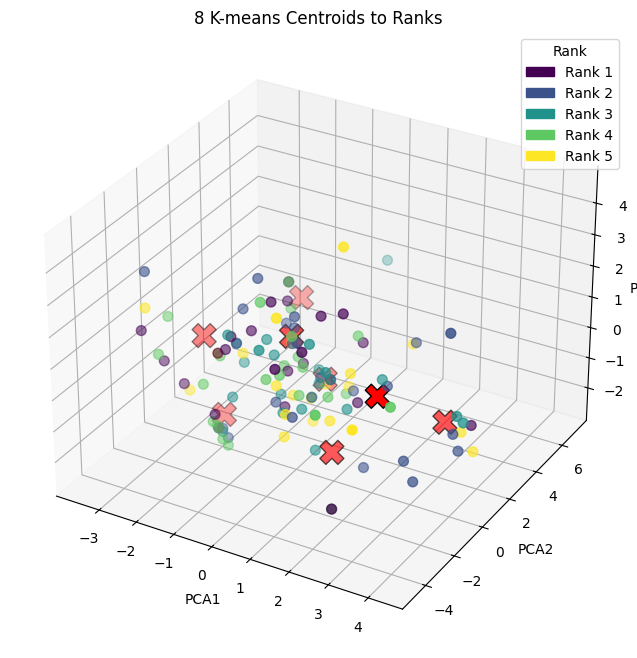

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Define the ranks (assumed to be in 'rank' column in df)
ranks = df['rank'].unique()

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=df['rank'], cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('8 K-means Centroids to Ranks')

# Add a color bar for ranks
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rank')

# Manually create legend patches based on unique ranks and corresponding colors from colormap
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(df['rank']), vmax=max(df['rank']))

# Create custom legend entries for each rank
legend_patches = [mpatches.Patch(color=cmap(norm(rank)), label=f'Rank {rank}') for rank in ranks]

# Add a legend for ranks
ax.legend(handles=legend_patches, title="Rank", loc='upper right')

#remove the color bar
cbar.remove()

plt.show()

### Finally we will do this with 10 Clusters

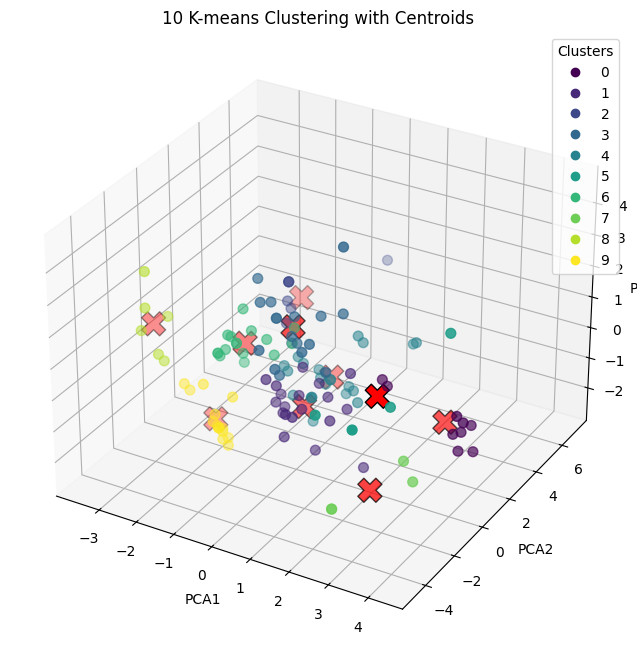

In [147]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=labels, cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('10 K-means Clustering with Centroids')

# Create a legend
legend_elements = [mpatches.Patch(label='Centroids', color='red')]
ax.legend(handles=legend_elements)

#add the clusters to the legend
plt.legend(*scatter.legend_elements(), title='Clusters')



plt.show()

#### Showing how Ranks are related to these clustered centroids

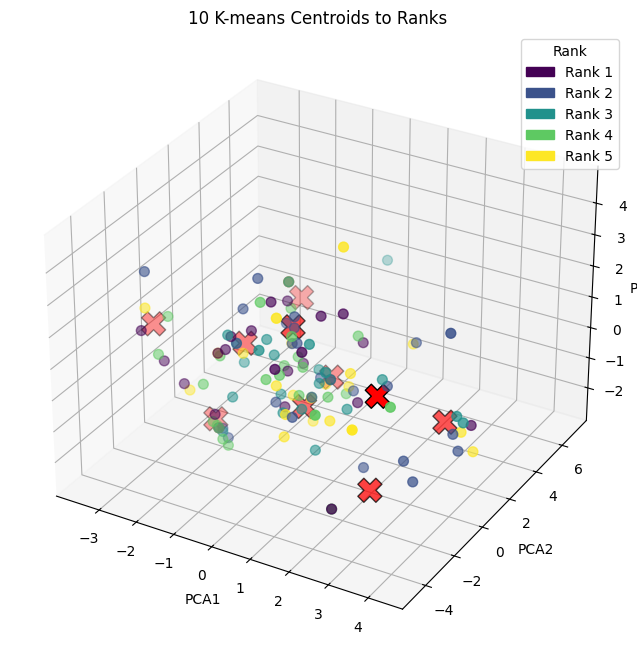

In [148]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.patches as mpatches

# Fit KMeans with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(data[['PCA1', 'PCA2', 'PCA3']])
labels = kmeans.predict(data[['PCA1', 'PCA2', 'PCA3']])
centroids = kmeans.cluster_centers_

# Define the ranks (assumed to be in 'rank' column in df)
ranks = df['rank'].unique()

# Plotting the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points, coloring by rank
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=df['rank'], cmap='viridis', s=50)

# Scatter plot for the centroids, making them larger and distinct in color
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='red', s=300, marker='X', edgecolor='black', label='Centroids')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('10 K-means Centroids to Ranks')

# Add a color bar for ranks
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Rank')

# Manually create legend patches based on unique ranks and corresponding colors from colormap
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(df['rank']), vmax=max(df['rank']))

# Create custom legend entries for each rank
legend_patches = [mpatches.Patch(color=cmap(norm(rank)), label=f'Rank {rank}') for rank in ranks]

# Add a legend for ranks
ax.legend(handles=legend_patches, title="Rank", loc='upper right')

#remove the color bar
cbar.remove()

plt.show()